# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
import json
url = f"http://api.openweathermap.org/data/2.5/forecast?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['city']['coord']['lat']
        city_lng = city_weather['city']['coord']['lon']
        city_max_temp = city_weather['list'][0]['main']['temp_max']
        city_humidity = city_weather['list'][0]['main']['humidity']
        city_clouds = city_weather['list'][0]['clouds']['all']
        city_wind = city_weather['list'][0]['wind']['speed']
        city_country = city_weather['city']['country']
        city_date = city_weather['list'][0]['dt_txt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | baghdad
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | comodoro rivadavia
Processing Record 6 of Set 1 | nueva guinea
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | mackenzie
Processing Record 9 of Set 1 | opuwo
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | farah
Processing Record 12 of Set 1 | sovetskaya gavan
Processing Record 13 of Set 1 | otane
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | zatoka
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | uwayl
City not found. Skipping...
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 |

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,21.26,58,36,3.68,RU,2023-08-16 06:00:00
1,baghdad,33.3406,44.4009,43.23,18,0,1.74,IQ,2023-08-16 06:00:00
2,rikitea,-23.1203,-134.9692,20.77,57,0,6.47,PF,2023-08-16 06:00:00
3,comodoro rivadavia,-45.8667,-67.5000,1.89,60,75,4.06,AR,2023-08-16 06:00:00
4,nueva guinea,11.6876,-84.4562,22.03,98,86,1.94,NI,2023-08-16 06:00:00


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,21.26,58,36,3.68,RU,2023-08-16 06:00:00
1,baghdad,33.3406,44.4009,43.23,18,0,1.74,IQ,2023-08-16 06:00:00
2,rikitea,-23.1203,-134.9692,20.77,57,0,6.47,PF,2023-08-16 06:00:00
3,comodoro rivadavia,-45.8667,-67.5000,1.89,60,75,4.06,AR,2023-08-16 06:00:00
4,nueva guinea,11.6876,-84.4562,22.03,98,86,1.94,NI,2023-08-16 06:00:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

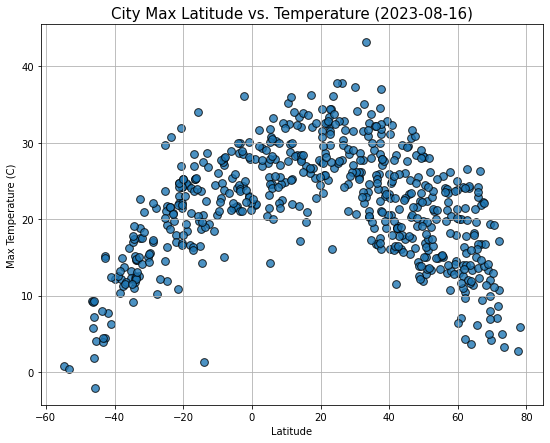

In [21]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=0.8,s=60)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature ({})'.format(city_data_df['Date'][0][:10]),size=15)
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

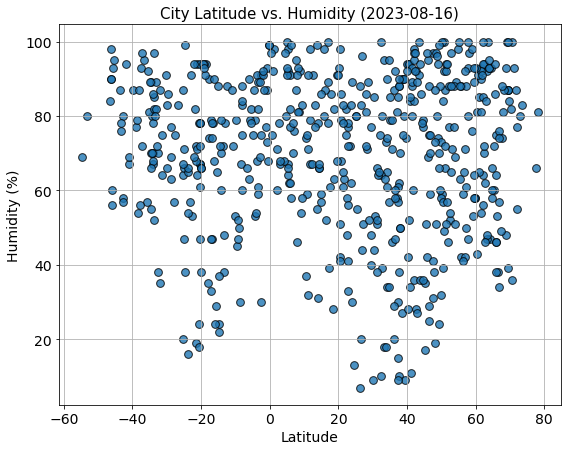

In [20]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

# Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Humidity (%)",size=14)
plt.title("City Latitude vs. Humidity ({})".format(city_data_df['Date'][0][:10]),size=15)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

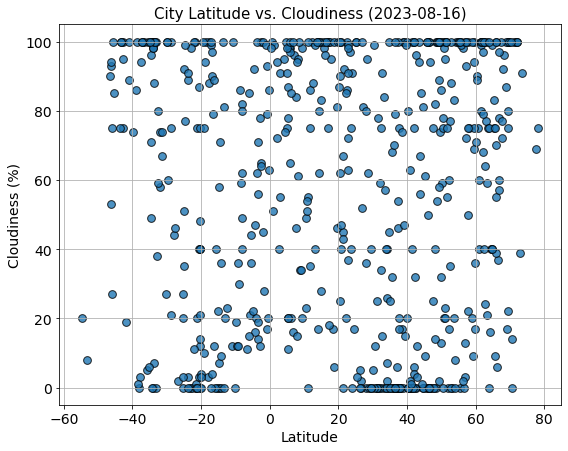

In [23]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

# Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Cloudiness (%)",size=14)
plt.title("City Latitude vs. Cloudiness ({})".format(city_data_df['Date'][0][:10]),size=15)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

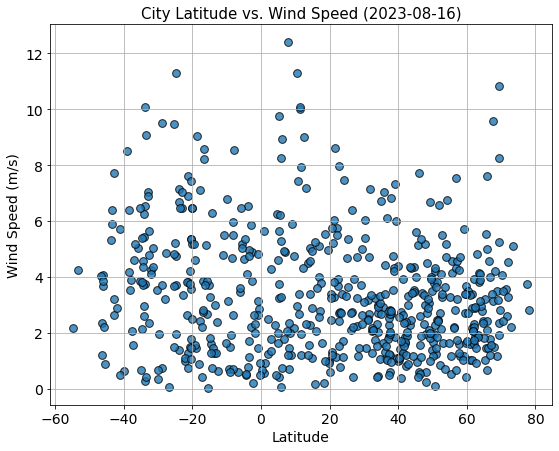

In [25]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

# Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Wind Speed (m/s)",size=14)
plt.title("City Latitude vs. Wind Speed ({})".format(city_data_df['Date'][0][:10]),size=15)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linearRegression(x, y):
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x ,y) 
    predicted_latitude = pe_slope * x + pe_int 
    return (predicted_latitude, pe_slope, pe_int, pe_r)

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,21.26,58,36,3.68,RU,2023-08-16 06:00:00
1,baghdad,33.3406,44.4009,43.23,18,0,1.74,IQ,2023-08-16 06:00:00
4,nueva guinea,11.6876,-84.4562,22.03,98,86,1.94,NI,2023-08-16 06:00:00
5,mackenzie,55.2999,-123.1698,15.12,63,0,0.54,CA,2023-08-16 06:00:00
8,farah,32.5000,62.5000,27.73,10,0,2.07,AF,2023-08-16 06:00:00


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,20.77,57,0,6.47,PF,2023-08-16 06:00:00
3,comodoro rivadavia,-45.8667,-67.5000,1.89,60,75,4.06,AR,2023-08-16 06:00:00
6,opuwo,-18.0607,13.8400,16.68,35,3,0.88,NaN,2023-08-16 06:00:00
7,hermanus,-34.4187,19.2345,11.00,80,100,4.56,ZA,2023-08-16 06:00:00
10,otane,-39.8833,176.6333,12.23,87,74,0.62,NZ,2023-08-16 06:00:00


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6482419801695838


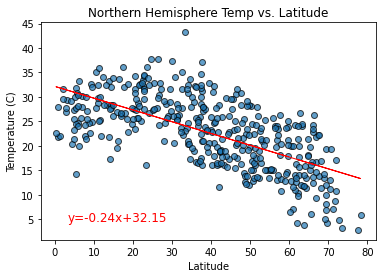

In [35]:
# Linear regression on Northern Hemisphere
north_temp, slope, y_int, r_val = linearRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Max Temp', data=northern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(northern_hemi_df['Lat'], north_temp, color="red", linewidth=1)
plt.text(3+0.2, 4.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Northern Hemisphere Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()

The r-value is: 0.774462459513771


Text(0, 0.5, 'Temperature (C)')

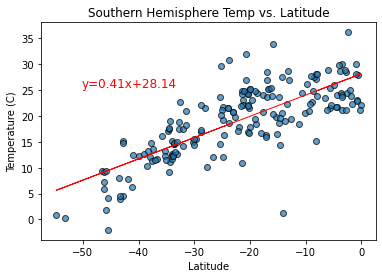

In [36]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere
south_temp, slope, y_int, r_val = linearRegression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Max Temp', data=southern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(southern_hemi_df['Lat'], south_temp, color="red", linewidth=1)
plt.text(-50.2, 25.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Southern Hemisphere Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')

**Discussion about the linear relationship:** 

There seems to be a positive correlation between temperature and latitude in the southern hemipshere and a negative correlation between temperature and latitude in the northern hemisphere. According to the r values, the correlation between temperature and latitude seems to be stronger in the northern hemisphere than the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.010395599967890799


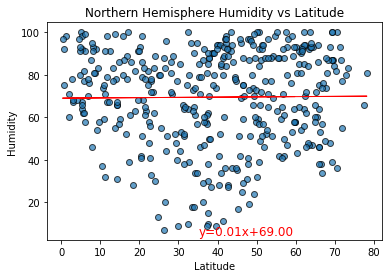

In [37]:
# Northern Hemisphere
north_humidity, slope, y_int, r_val = linearRegression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Humidity', data=northern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(northern_hemi_df['Lat'], north_humidity, color="red", linewidth=1)
plt.text(35.2, 4.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Northern Hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: -0.08909195655490228


Text(0, 0.5, 'Humidity')

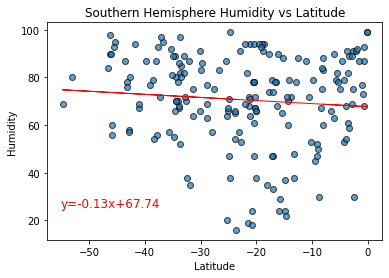

In [38]:
# Southern Hemisphere
south_humidity, slope, y_int, r_val = linearRegression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Humidity', data=southern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(southern_hemi_df['Lat'], south_humidity, color="red", linewidth=1)
plt.text(-55.2, 25.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Southern Hemisphere Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

**Discussion about the linear relationship:** 

There seems to be a weak positive relationship between humidity and latitude in the northern hemisphere and a weak negative relationship between humidity and latitude in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.005780680495310453


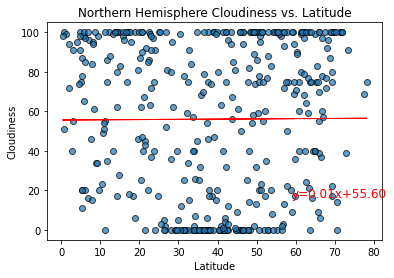

In [41]:
# Northern Hemisphere
north_clouds, slope, y_int, r_val = linearRegression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Cloudiness', data=northern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(northern_hemi_df['Lat'], north_clouds, color="red", linewidth=1)
plt.text(59, 16.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Northern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: -0.19588601342703407


Text(0, 0.5, 'Cloudiness')

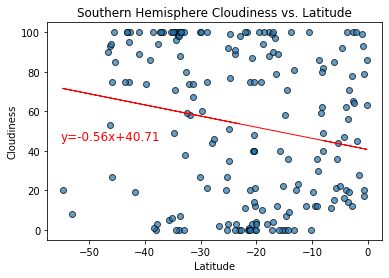

In [42]:
# Southern Hemisphere
south_clouds, slope, y_int, r_val = linearRegression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Cloudiness', data=southern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(southern_hemi_df['Lat'], south_clouds, color="red", linewidth=1)
plt.text(-55.2, 45.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Southern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** 
There seems to be a very weak positive relationship between cloudiness and latitude in the northern hemisphere and a negative relationship between cloudiness and latitude in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


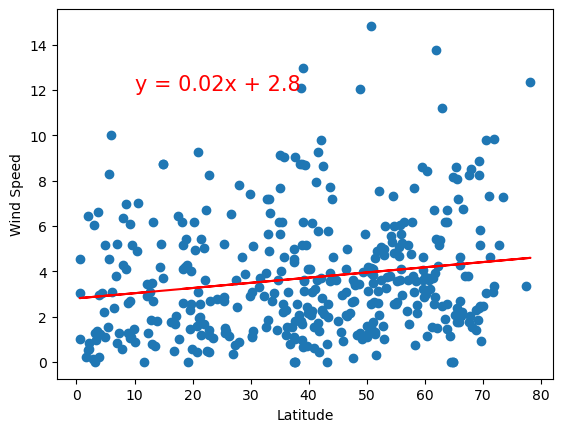

In [21]:
# Northern Hemisphere
north_wind, slope, y_int, r_val = linearRegression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Wind Speed', data=northern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(northern_hemi_df['Lat'], north_wind, color="red", linewidth=1)
plt.text(59, 10.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Northern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.1392873700129163


Text(0, 0.5, 'Wind Speed')

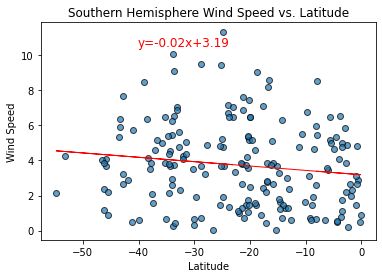

In [43]:
# Southern Hemisphere
south_wind, slope, y_int, r_val = linearRegression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Wind Speed', data=southern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(southern_hemi_df['Lat'], south_wind, color="red", linewidth=1)
plt.text(-40.2, 10.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Southern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** 
There seems to be a slight positive relationship between windspeed and latitude in the norhtern hemisphere and a slight negative relationship between windspeed and latitude in the southern hemisphere.